# Data Exploration

In [17]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot


In [2]:
# graphing data
df = pd.read_csv('data/football_data.csv')
df.head()


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,Season
0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,M Riley,...,7.0,8.0,0.0,2.0,0.0,0.0,2.30,3.25,3.00,2005
1,13/08/05,Everton,Man United,0.0,2.0,A,0.0,1.0,A,G Poll,...,8.0,6.0,3.0,1.0,0.0,0.0,5.00,3.40,1.72,2005
2,13/08/05,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,R Styles,...,6.0,6.0,1.0,2.0,0.0,0.0,2.37,3.25,2.87,2005
3,13/08/05,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,C Foy,...,3.0,6.0,2.0,3.0,0.0,0.0,1.72,3.40,5.00,2005
4,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,M Halsey,...,5.0,0.0,2.0,3.0,1.0,0.0,2.87,3.20,2.40,2005


In [3]:
df.shape


(6961, 26)

In [4]:
# Create Home Win, Draw Win and Away Win columns
df = df.assign(homeWin=lambda df: df.apply(lambda row: 1 if row.FTHG > row.FTAG else 0, axis='columns'),
              draw=lambda df: df.apply(lambda row: 1 if row.FTHG == row.FTAG else 0, axis='columns'),
              awayWin=lambda df: df.apply(lambda row: 1 if row.FTHG < row.FTAG else 0, axis='columns'))


In [5]:
# lower case all column names
df.columns = [x.lower() for x in df.columns]
df.columns


Index(['date', 'hometeam', 'awayteam', 'fthg', 'ftag', 'ftr', 'hthg', 'htag',
       'htr', 'referee', 'hs', 'as', 'hst', 'ast', 'hf', 'af', 'hc', 'ac',
       'hy', 'ay', 'hr', 'ar', 'b365h', 'b365d', 'b365a', 'season', 'homewin',
       'draw', 'awaywin'],
      dtype='object')

In [6]:
# checking win rates for each season
win_rates = \
(df[['homewin', 'draw', 'awaywin']]
    .astype(float)
    .groupby(df['season'])
    .mean())

win_rates


,homewin,draw,awaywin
season,,,
2005,0.505263,0.202632,0.292105
2006,0.478947,0.257895,0.263158
2007,0.463158,0.263158,0.273684
2008,0.455263,0.255263,0.289474
2009,0.507895,0.252632,0.239474
2010,0.471053,0.292105,0.236842
2011,0.450000,0.244737,0.305263
2012,0.436842,0.284211,0.278947
2013,0.471053,0.205263,0.323684


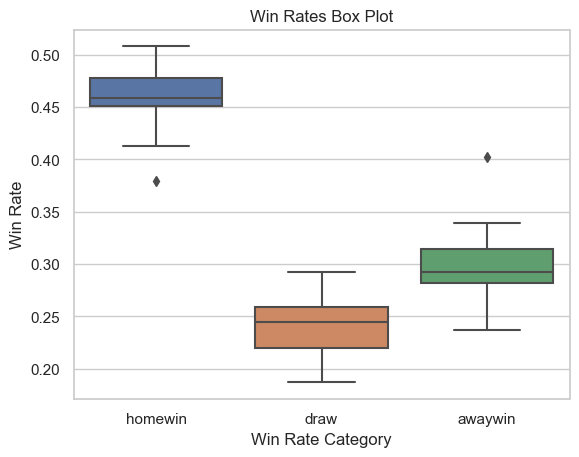

In [7]:
#

# Set the style
sns.set(style="whitegrid")

# Create a box plot for each win rate category
sns.boxplot(data=win_rates)

# Set the labels and title
plt.xlabel("Win Rate Category")
plt.ylabel("Win Rate")
plt.title("Win Rates Box Plot")

# Show the plot
plt.show()


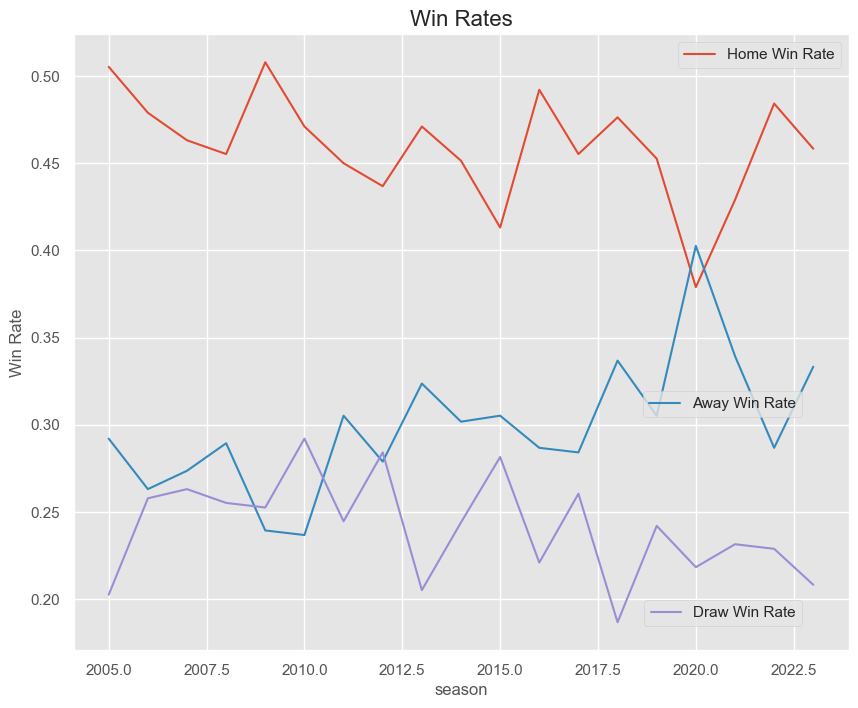

In [8]:
# Set the style
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

home_line = ax.plot(win_rates['homewin'], label='Home Win Rate')
away_line = ax.plot(win_rates['awaywin'], label='Away Win Rate')
draw_line = ax.plot(win_rates['draw'], label='Draw Win Rate')
ax.set_xlabel("season")
ax.set_ylabel("Win Rate")
plt.title("Win Rates", fontsize=16)

# Add the legend locations
home_legend = plt.legend(handles=home_line, loc='upper right', bbox_to_anchor=(1, 1))
ax = plt.gca().add_artist(home_legend)
away_legend = plt.legend(handles=away_line, loc='center right', bbox_to_anchor=(0.95, 0.4))
ax = plt.gca().add_artist(away_legend)
draw_legend = plt.legend(handles=draw_line, loc='center right', bbox_to_anchor=(0.95, 0.06))


In [9]:
home_win_rates = \
(df.groupby(['hometeam'])
    .homewin
    .mean())

away_win_rates = \
(df.groupby(['awayteam'])
    .awaywin
    .mean())

hga = (home_win_rates - away_win_rates).reset_index().rename(columns={0: 'hga'}).sort_values(by='hga', ascending=False)


In [10]:
hga.head(10)


,hometeam,hga
28,Nott'm Forest,0.339744
16,Fulham,0.254534
31,Reading,0.245614
34,Stoke,0.242105
11,Charlton,0.236842
32,Sheffield United,0.222222
23,Man City,0.221861
37,Tottenham,0.218417
0,Arsenal,0.215222
25,Middlesbrough,0.210526


In [11]:
big_clubs = ['Liverpool', 'Man City', 'Man United', 'Chelsea', 'Arsenal']
home_win_rates_5 = df[df['hometeam'].isin(big_clubs)].groupby(['hometeam', 'season'])['homewin'].mean()
away_win_rates_5 = df[df['awayteam'].isin(big_clubs)].groupby(['awayteam', 'season'])['awaywin'].mean()

hga_top_5 = home_win_rates_5 - away_win_rates_5

hga_top_5.unstack(level=0)


hometeam,Arsenal,Chelsea,Liverpool,Man City,Man United
season,,,,,
2005,0.421053,0.368421,0.263158,0.263158,0.052632
2006,0.263158,0.000000,0.421053,-0.052632,0.105263
2007,0.210526,-0.052632,0.157895,0.368421,0.368421
2008,0.105263,-0.157895,-0.052632,0.578947,0.210526
2009,0.368421,0.368421,0.421053,0.315789,0.263158
2010,0.157895,0.368421,0.368421,0.263158,0.684211
2011,0.157895,0.315789,-0.105263,0.421053,0.105263
2012,0.052632,0.105263,0.105263,0.263158,0.210526
2013,0.105263,0.263158,0.315789,0.368421,-0.052632


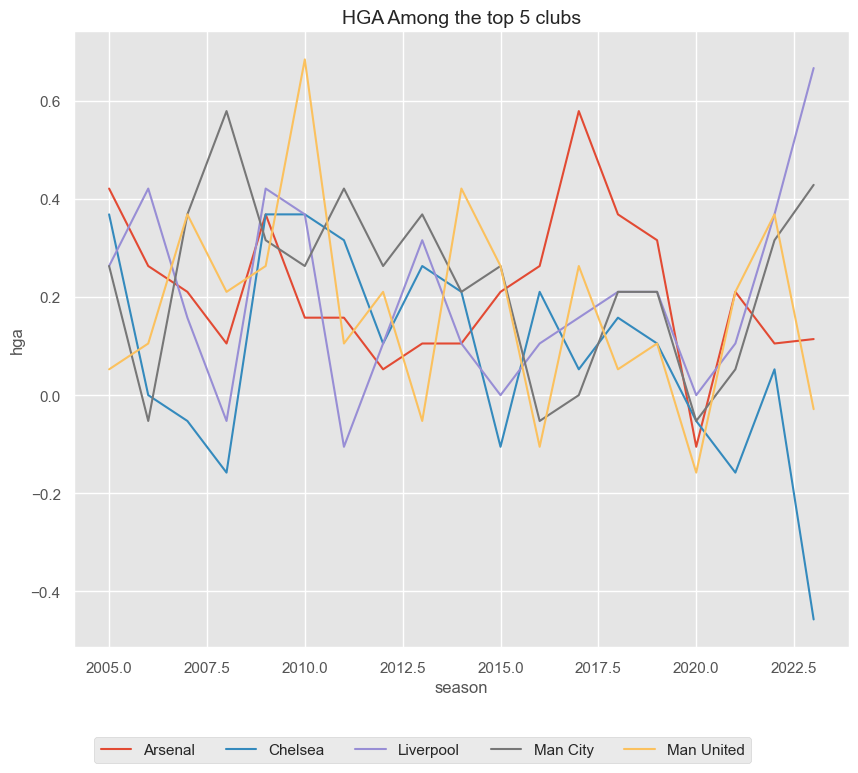

In [12]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='season', y='hga', hue='team', data=hga_top_5.reset_index().rename(columns={0: 'hga', 'hometeam': 'team'}))
plt.legend(loc='lower center', ncol=6, bbox_to_anchor=(0.45, -0.2))
plt.title("HGA Among the top 5 clubs", fontsize=14)
plt.show()


In [13]:
df.head()


,date,hometeam,awayteam,fthg,ftag,ftr,hthg,htag,htr,referee,...,ay,hr,ar,b365h,b365d,b365a,season,homewin,draw,awaywin
0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,M Riley,...,2.0,0.0,0.0,2.30,3.25,3.00,2005,0,1,0
1,13/08/05,Everton,Man United,0.0,2.0,A,0.0,1.0,A,G Poll,...,1.0,0.0,0.0,5.00,3.40,1.72,2005,0,0,1
2,13/08/05,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,R Styles,...,2.0,0.0,0.0,2.37,3.25,2.87,2005,0,1,0
3,13/08/05,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,C Foy,...,3.0,0.0,0.0,1.72,3.40,5.00,2005,0,1,0
4,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,M Halsey,...,3.0,1.0,0.0,2.87,3.20,2.40,2005,0,1,0


In [14]:
# how many numeric columms do we have?
df.select_dtypes(include=['int64', 'float64']).columns


Index(['fthg', 'ftag', 'hthg', 'htag', 'hs', 'as', 'hst', 'ast', 'hf', 'af',
       'hc', 'ac', 'hy', 'ay', 'hr', 'ar', 'b365h', 'b365d', 'b365a', 'season',
       'homewin', 'draw', 'awaywin'],
      dtype='object')

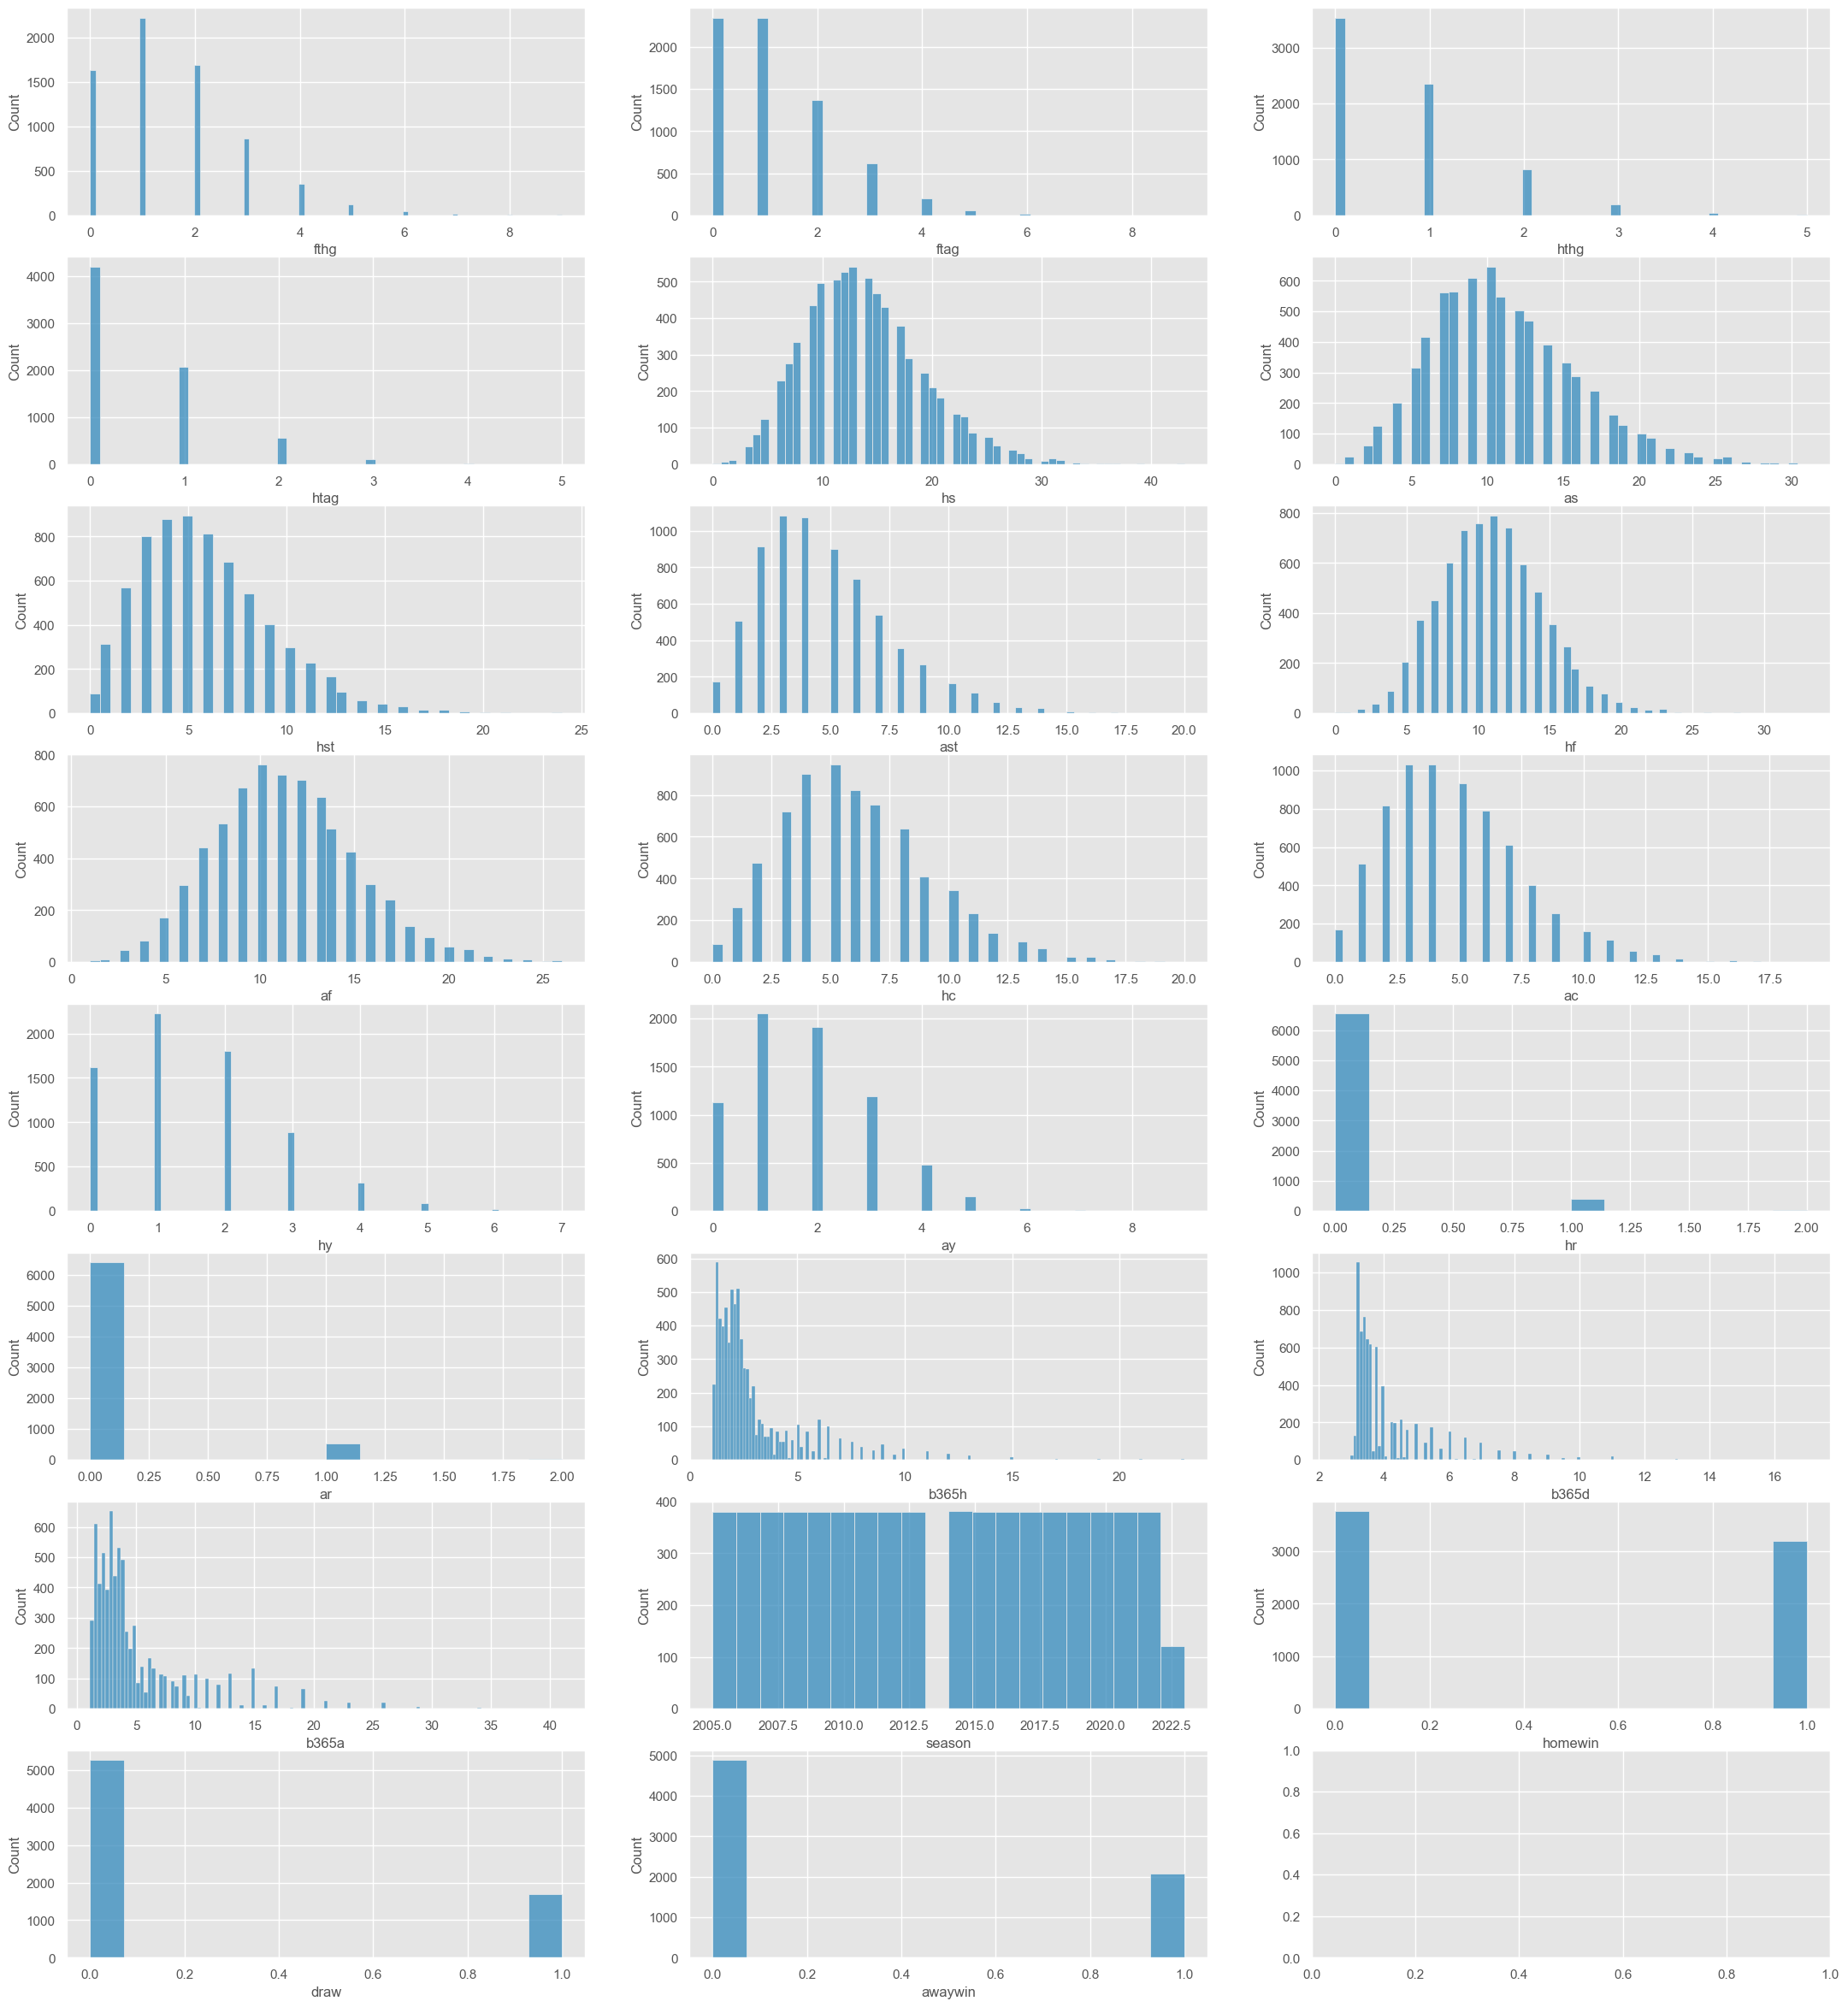

In [15]:
# Set the style
plt.style.use('ggplot')

# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(15, 20))
plt.subplots_adjust(right=1.5, top=1.25)

# Plot all histograms
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(8, 3, i)
    sns.histplot(df[column])
    plt.xlabel(column)

plt.show()


/var/folders/hc/lcgvr8h11sq4z32r5nwftth80000gp/T/ipykernel_43518/323033705.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax =plt.subplots(1,3,figsize=(15,3))


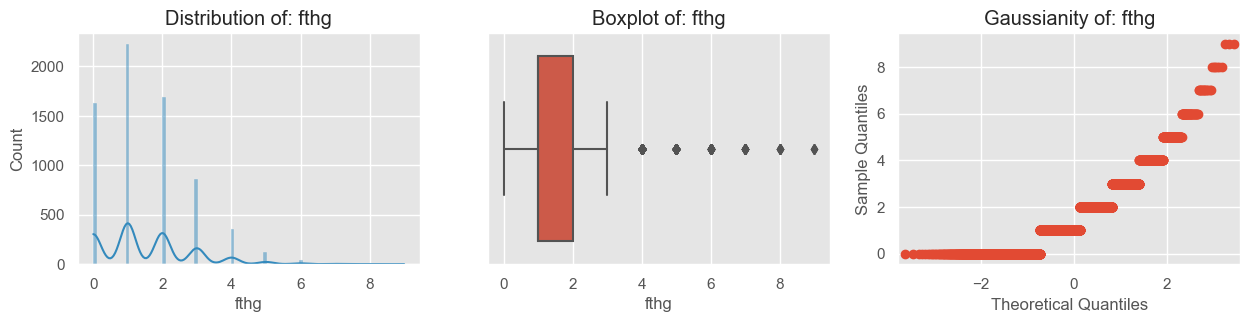

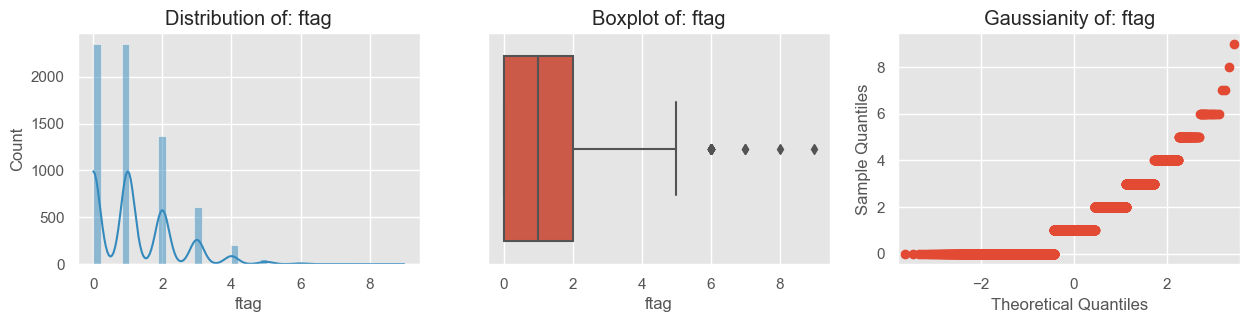

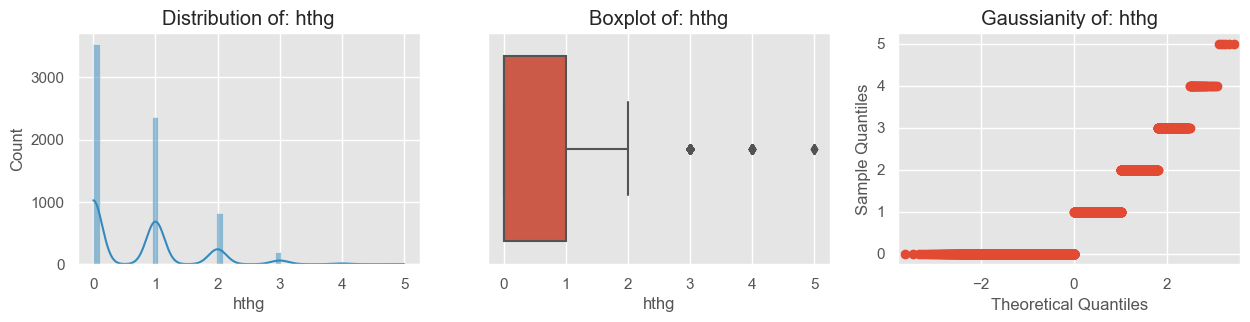

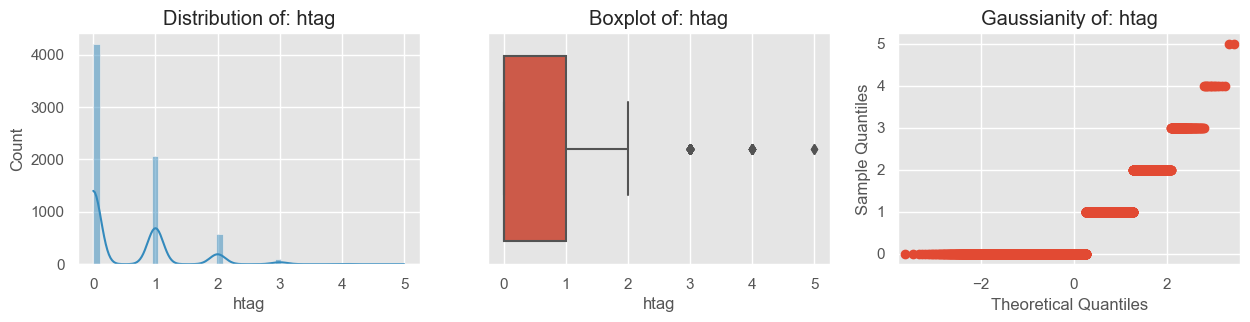

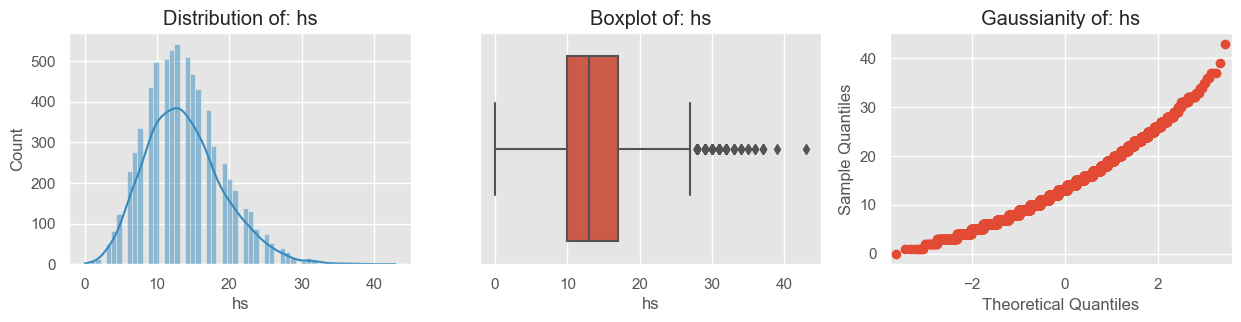

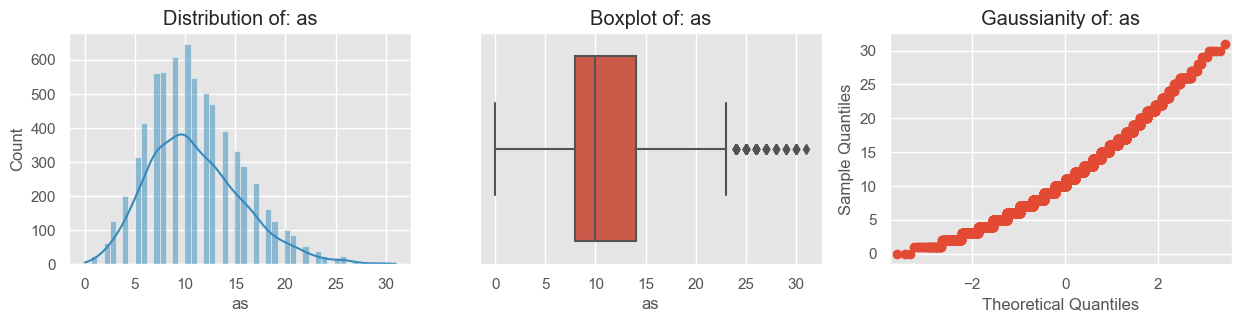

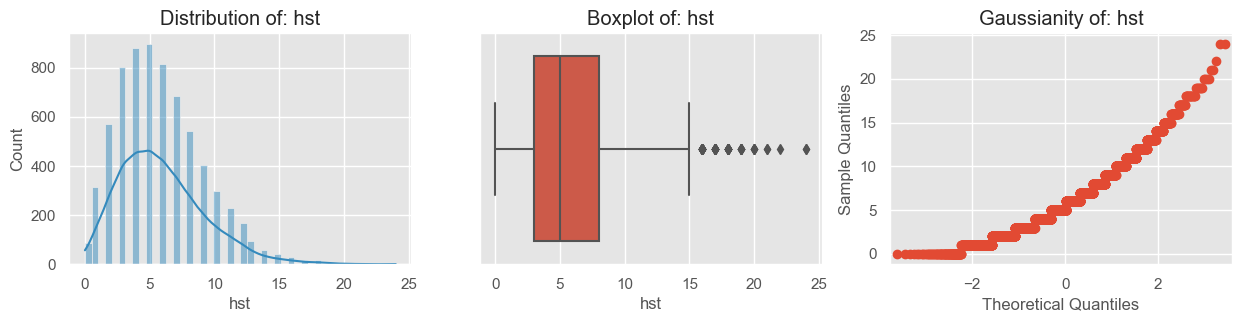

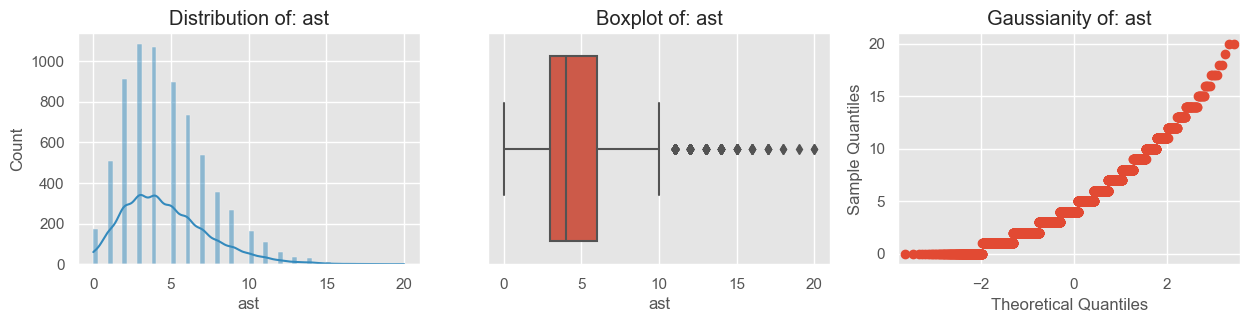

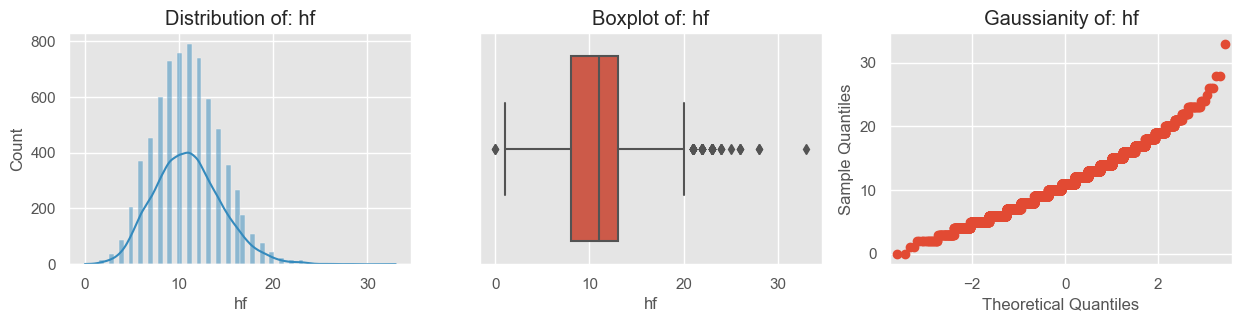

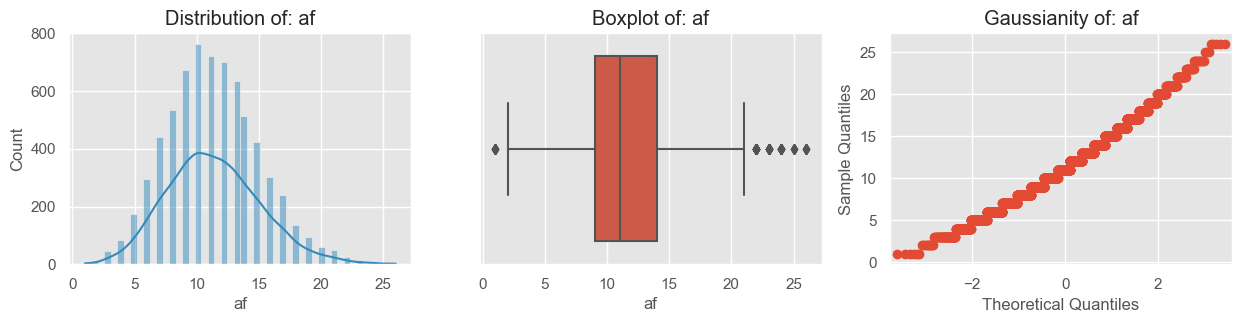

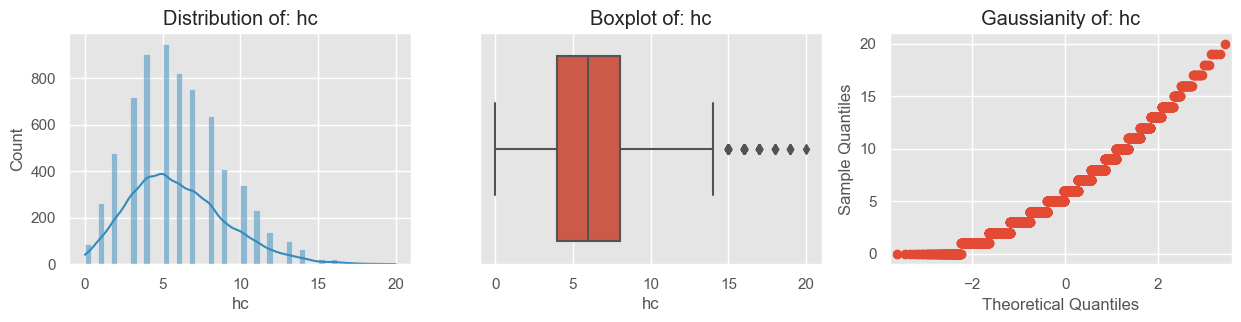

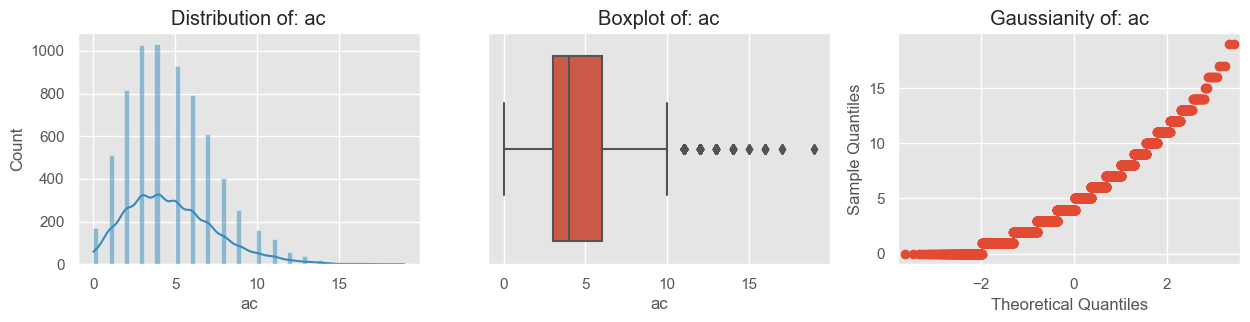

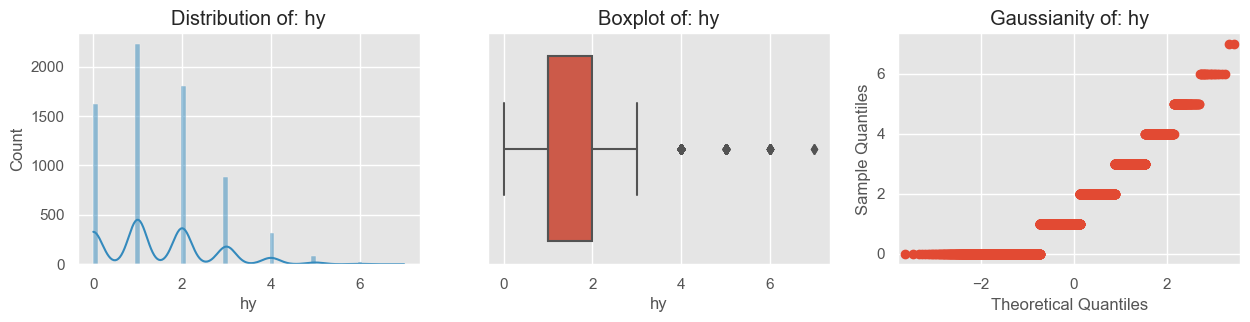

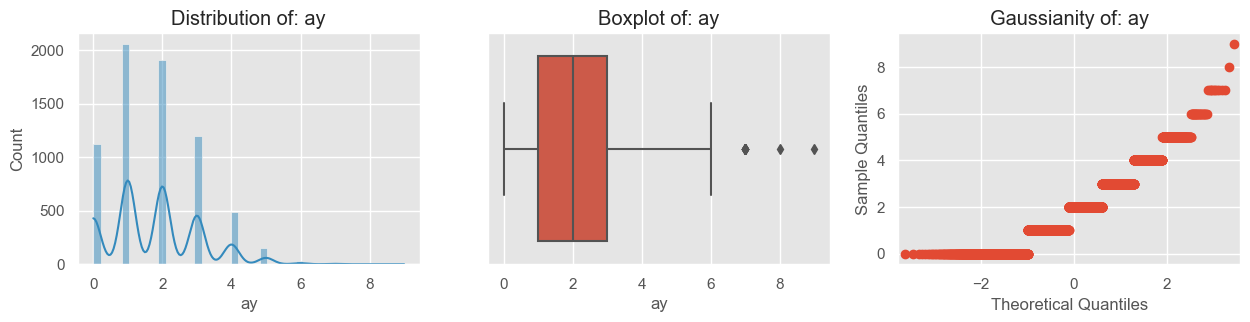

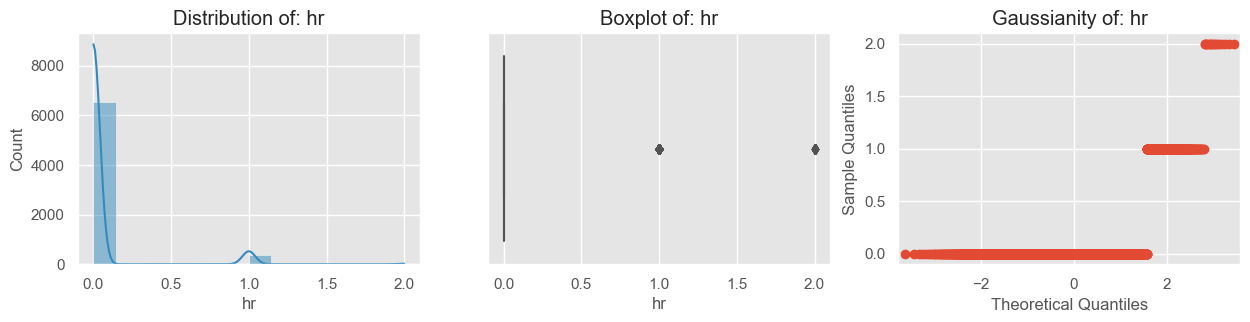

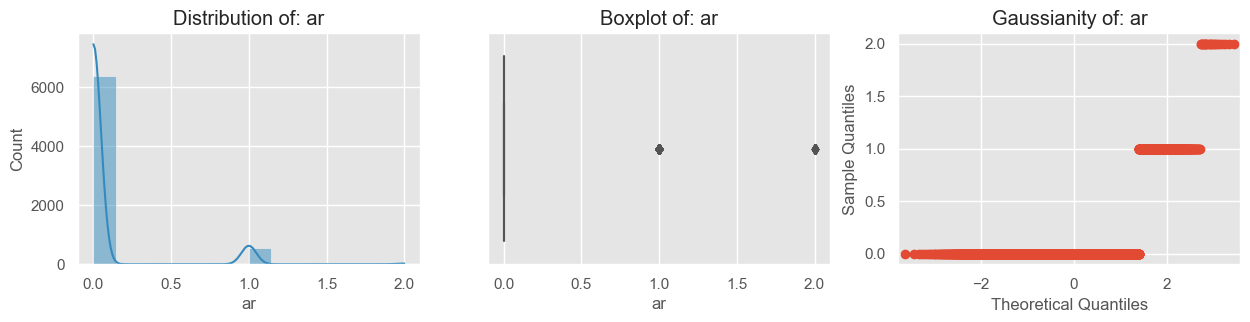

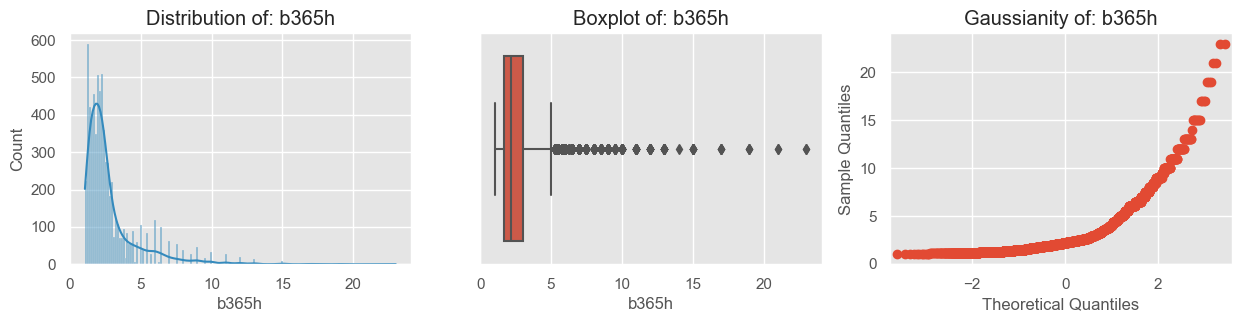

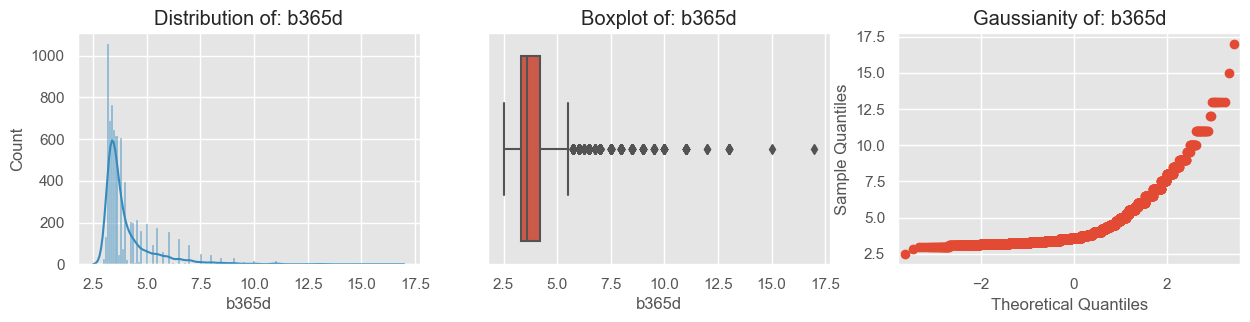

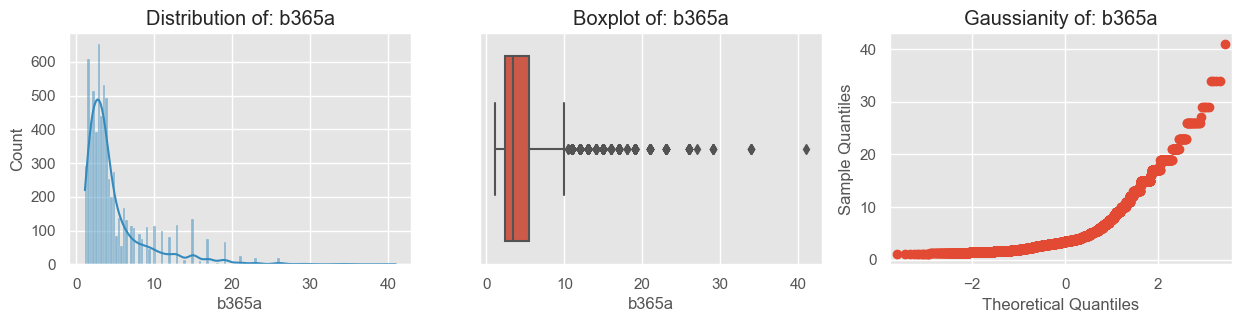

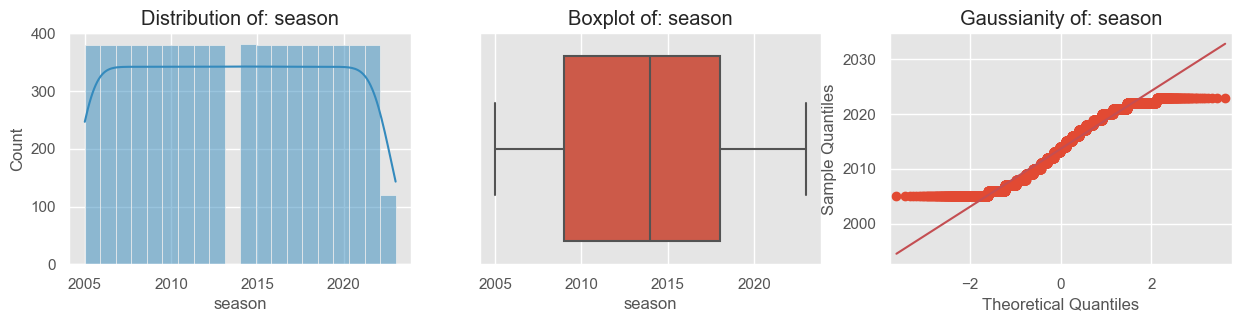

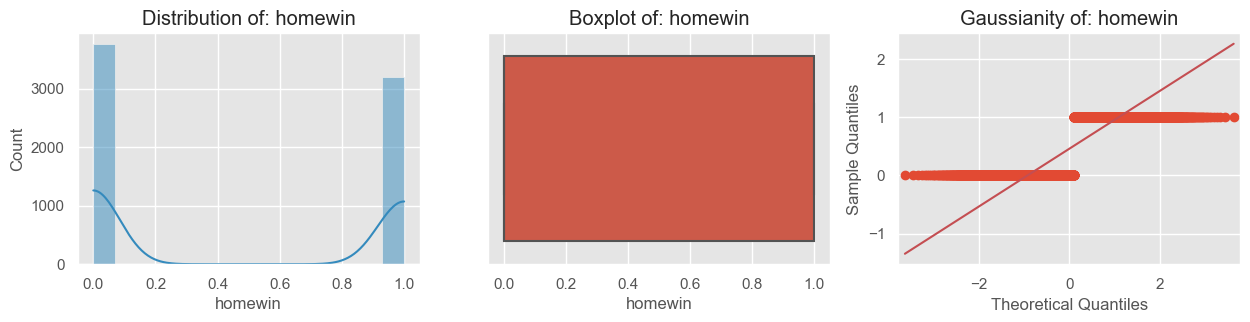

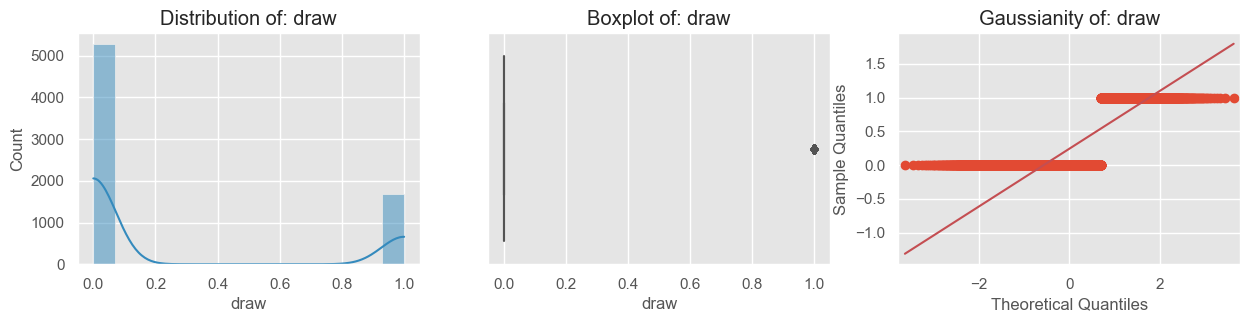

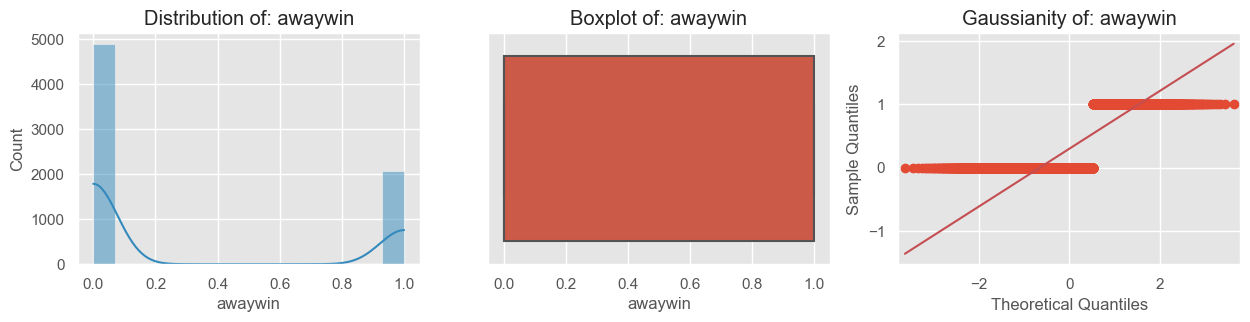

In [18]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for numerical_feature in numerical_features:

    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))

    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = df, x = numerical_feature, kde=True, ax = ax[0])

    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data = df, x = numerical_feature, ax=ax[1])

    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(df[numerical_feature],line='s',ax=ax[2]);


## Exploring Referee Home Ground Bias

### What may be of interest is whether certain referees are correlated with the home team winning more often. Let's explore referee home ground bias for referees for the top 10 Referees based on games.

In [94]:
print('Overall Home Win Rate: {:.4}%'.format(df['homewin'].mean() * 100))

# Get the top 10 refs based on games
top_10_refs = df['referee'].value_counts().head(10).index

df[df['referee'].isin(top_10_refs)].groupby('referee')['homewin'].mean().sort_values(ascending=False)


Overall Home Win Rate: 45.96%


referee
L Mason          0.501742
M Clattenburg    0.478261
M Atkinson       0.460526
J Moss           0.459854
H Webb           0.458647
M Oliver         0.456825
K Friend         0.455882
M Dean           0.439076
A Taylor         0.435028
A Marriner       0.422680
Name: homewin, dtype: float64

### Variable Correlation With Margin

#### Let's now explore different variables' relationships with margin. First, we'll create a margin column, then we will pick a few different variables to look at the correlations amongst each other, using a correlation heatmap

In [95]:
df['margin'] = df['fthg'] - df['ftag']


In [96]:
df.select_dtypes(include=['int64', 'float64']).columns


Index(['fthg', 'ftag', 'hthg', 'htag', 'hs', 'as', 'hst', 'ast', 'hf', 'af',
       'hc', 'ac', 'hy', 'ay', 'hr', 'ar', 'b365h', 'b365d', 'b365a', 'season',
       'homewin', 'draw', 'awaywin', 'margin'],
      dtype='object')

In [97]:
stat_cols = ['hs', 'as', 'hst', 'ast', 'hf', 'af','hc', 'ac', 'hy', 'ay', 'hr', 'ar', 'margin']

stat_correlations = df[stat_cols].corr()
stat_correlations['margin'].sort_values()


ast      -0.370625
as       -0.318459
hy       -0.147848
hr       -0.130525
ac       -0.085599
hf       -0.054605
af        0.005168
ay        0.015807
hc        0.085160
ar        0.102702
hs        0.295948
hst       0.398677
margin    1.000000
Name: margin, dtype: float64

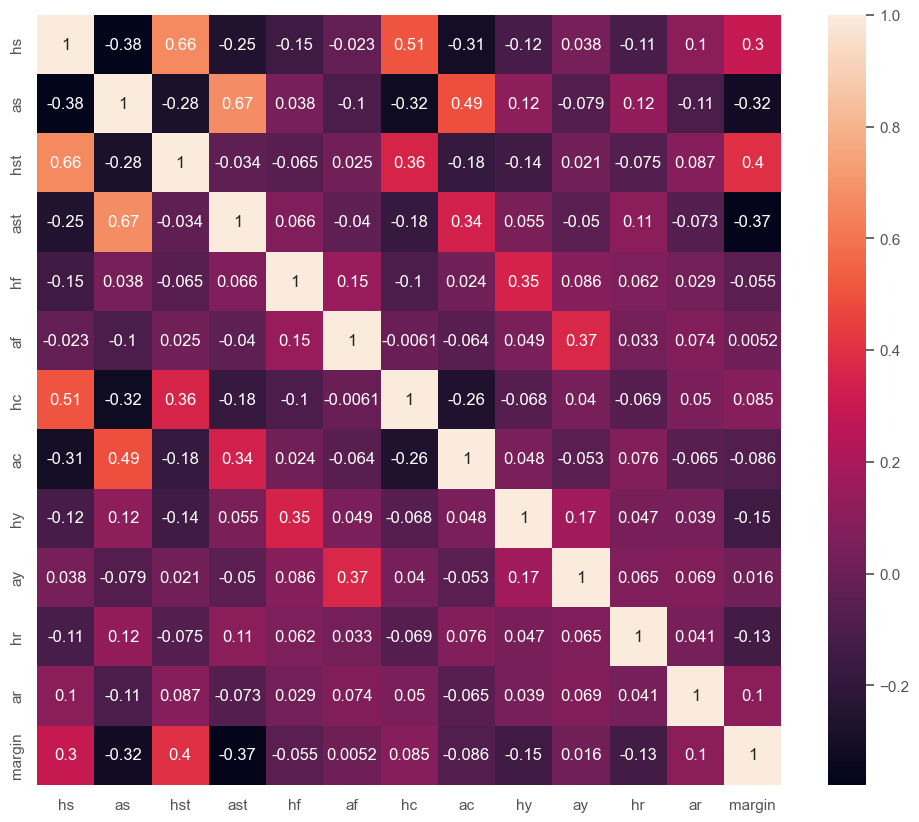

In [98]:
# Set the style
plt.style.use('ggplot')

# Create a figure with a larger size
fig, axes = plt.subplots(figsize=(12, 10))

# Plot the heatmap with larger correlation numbers
sns.heatmap(stat_correlations, annot=True, annot_kws={'size': 12})

plt.show()


# To do possibilities

 - use more preditors
 - use other ML algoritm
 - more championships
 - time series analysis - seasonal effects ?
 - add odds to data from football data
 - back testing strategies with odds